<a href="https://colab.research.google.com/github/Sarthakkadu18/Amazon-User-Segmentation/blob/main/Amazon_User_Segmentation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Step 1: Generating and Preprocessing Data ---
Original Data Head:
   UserID  Age   TotalSpend  PurchaseFrequency  AvgOrderValue  \
0       1   56  1645.651533                  6     274.275255   
1       2   46  4058.878507                 32     126.839953   
2       3   32  1310.471241                 29      45.188663   
3       4   60  3423.438475                 43      79.614848   
4       5   25  3813.127906                  2    1906.563953   

  ProductCategories  BrowsingDuration_min  
0              Toys             65.834134  
1              Toys            240.917035  
2       Electronics            103.414003  
3       Electronics            260.232037  
4       Electronics            275.000870  

Missing values before cleaning:
 UserID                  0
Age                     0
TotalSpend              0
PurchaseFrequency       0
AvgOrderValue           0
ProductCategories       0
BrowsingDuration_min    0
dtype: int64

Data successfully preprocessed and scaled.
--

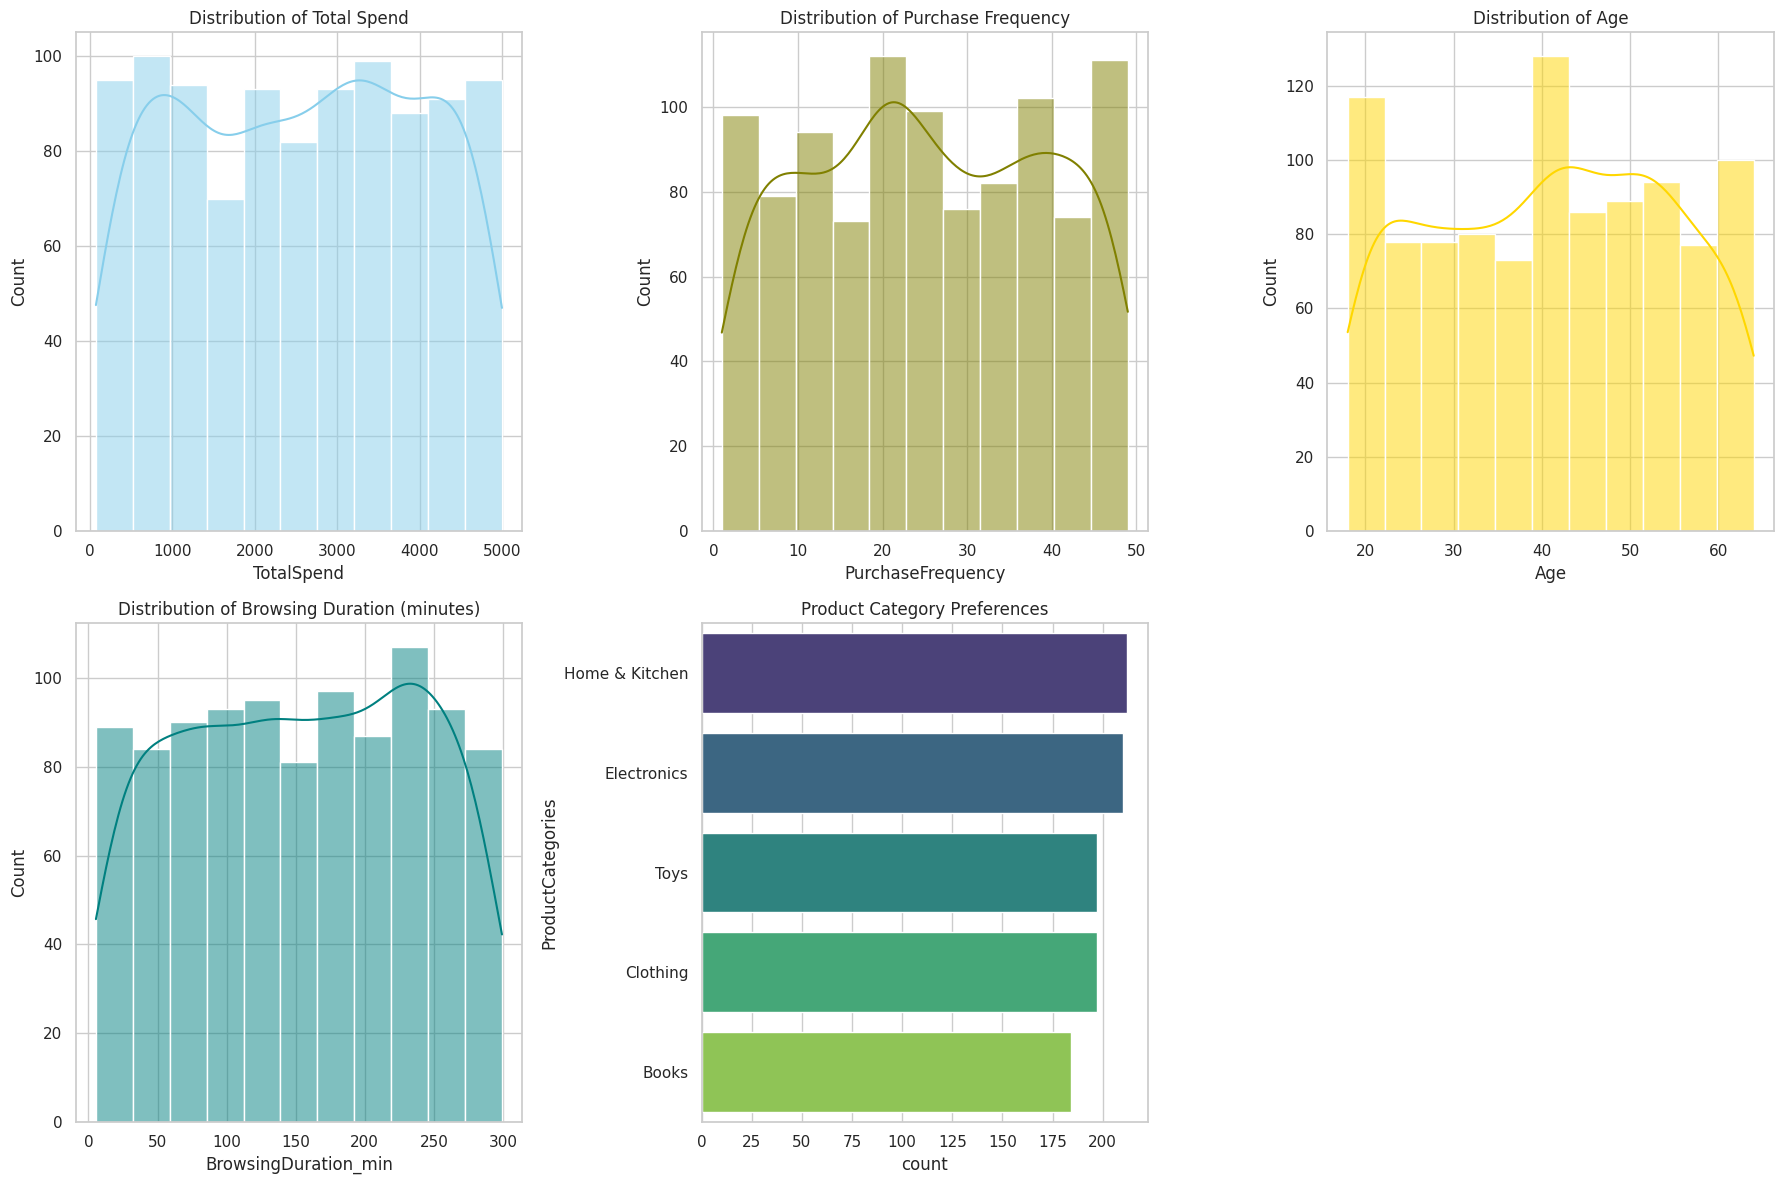

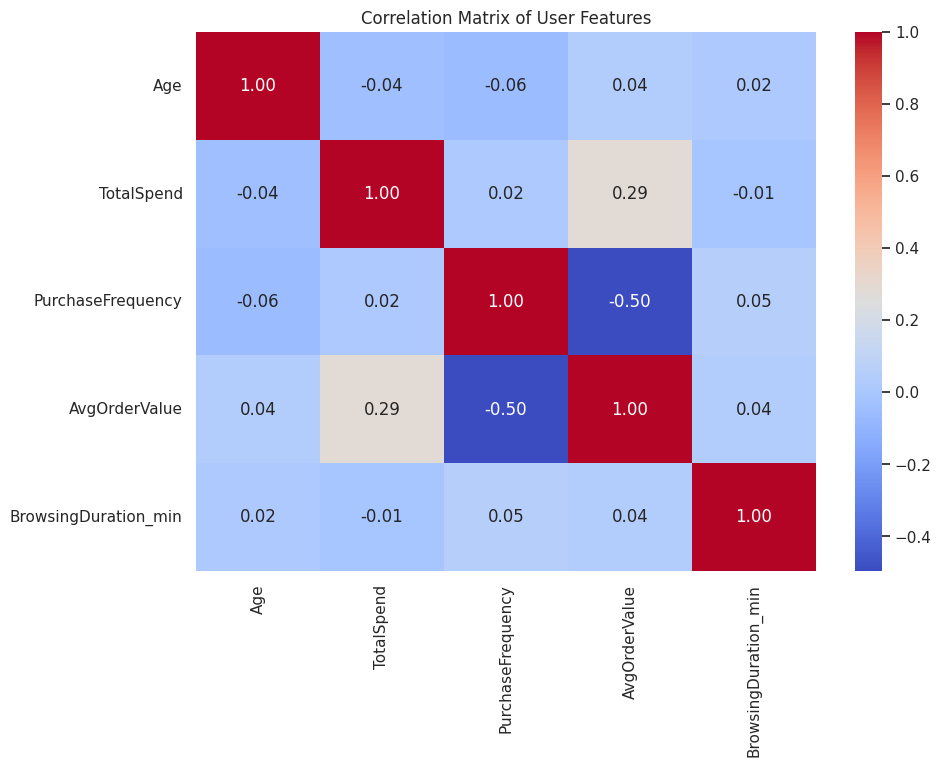

EDA visualizations generated.
--------------------------------------------------

--- Step 3: Clustering with K-Means ---


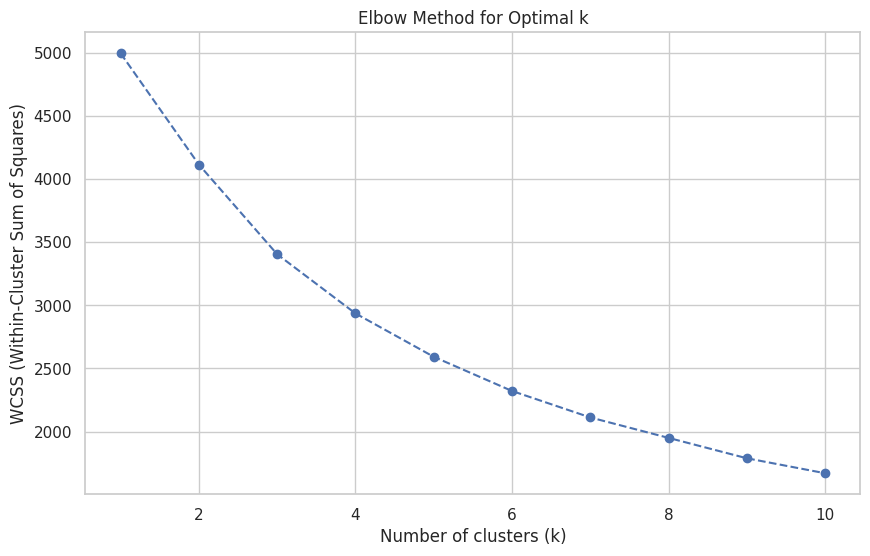

Based on the Elbow Method, the optimal number of clusters is chosen as 4.

Clustering Evaluation Metrics:
Silhouette Score: 0.19
Davies-Bouldin Index: 1.48
--------------------------------------------------

--- Step 4: Analyzing and Visualizing Segments ---
Average Characteristics per Segment:
           Age  TotalSpend  PurchaseFrequency  AvgOrderValue  \
Segment                                                        
0        43.21     3768.73               3.16        1544.24   
1        43.55     1464.21              19.42         134.11   
2        36.76     3939.57              28.62         174.69   
3        42.92     1738.00              31.25          76.42   

         BrowsingDuration_min  
Segment                        
0                      167.73  
1                       83.73  
2                      140.97  
3                      228.62  


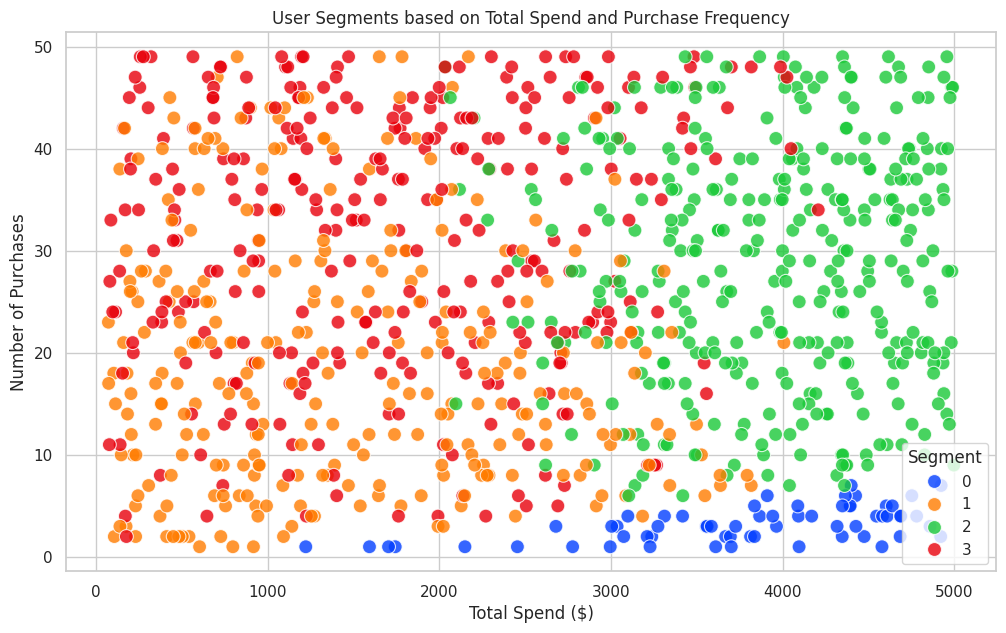


Generating pairplot for detailed segment analysis...


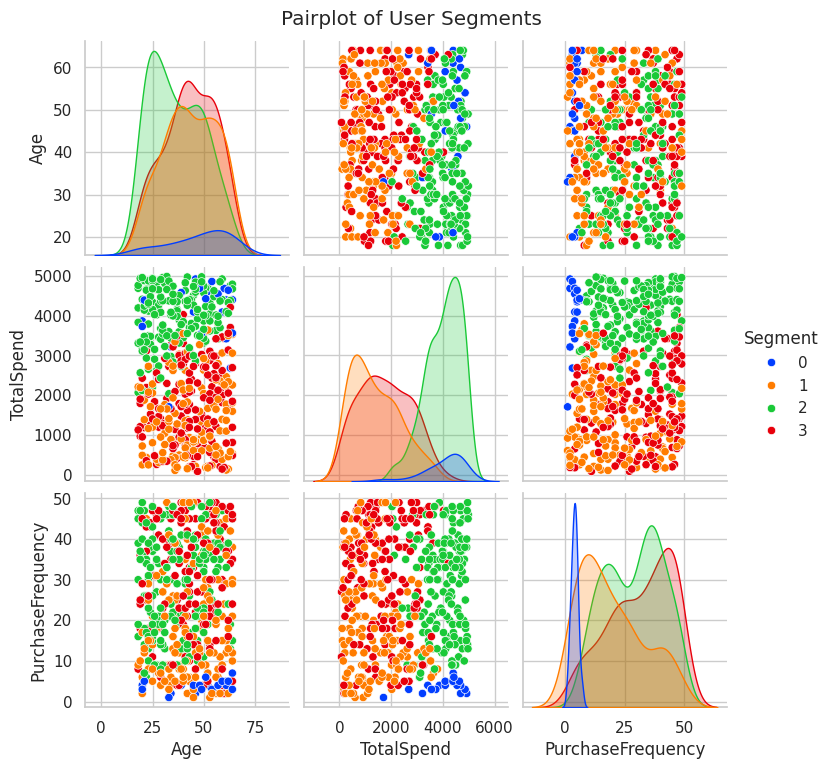

Segmentation analysis complete.
--------------------------------------------------

--- Step 5: Reporting and Insights ---
Segment Interpretation:

--- Segment 0: ---
Number of users: 62
Average Total Spend: $3768.73
Average Purchase Frequency: 3.16 purchases
Most Popular Category: Electronics
>> Profile: Occasional Big Spenders
>> Strategy: Re-engage with marketing for high-ticket items and seasonal sales events.

--- Segment 1: ---
Number of users: 284
Average Total Spend: $1464.21
Average Purchase Frequency: 19.42 purchases
Most Popular Category: Home & Kitchen
>> Profile: Casual Browsers / New Customers
>> Strategy: Nurture with welcome offers, introductory guides, and recommendations based on browsing history.

--- Segment 2: ---
Number of users: 346
Average Total Spend: $3939.57
Average Purchase Frequency: 28.62 purchases
Most Popular Category: Books
>> Profile: High-Value, Frequent Shoppers
>> Strategy: Offer loyalty rewards, exclusive previews, and personalized high-end recomme

In [1]:
# AMAZON USER SEGMENTATION PROJECT

# This script performs user segmentation on a synthetic Amazon customer dataset.
# It follows a standard data science workflow:
# 1. Data Generation & Preprocessing
# 2. Exploratory Data Analysis (EDA)
# 3. Feature Engineering & Clustering
# 4. Segmentation Analysis & Visualization

# --- 1. Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings

# Ignore warnings for a cleaner output
warnings.filterwarnings('ignore')

# --- 2. Data Generation & Preprocessing ---

# In a real-world scenario, you would collect this data from Amazon's databases.
# For this project, we'll generate a synthetic dataset to simulate user behavior.
print("--- Step 1: Generating and Preprocessing Data ---")

# Generate synthetic data for 1000 users
np.random.seed(42)
data = {
    'UserID': range(1, 1001),
    'Age': np.random.randint(18, 65, size=1000),
    'TotalSpend': np.random.uniform(50, 5000, size=1000),
    'PurchaseFrequency': np.random.randint(1, 50, size=1000),
    'AvgOrderValue': lambda x: x['TotalSpend'] / x['PurchaseFrequency'],
    'ProductCategories': [np.random.choice(['Electronics', 'Books', 'Home & Kitchen', 'Clothing', 'Toys']) for _ in range(1000)],
    'BrowsingDuration_min': np.random.uniform(5, 300, size=1000)
}
df = pd.DataFrame(data)
df['AvgOrderValue'] = df.apply(df['AvgOrderValue'], axis=1)

print("Original Data Head:")
print(df.head())

# --- Data Cleaning ---
# Check for missing values
print("\nMissing values before cleaning:\n", df.isnull().sum())
# No missing values in this synthetic dataset, but in a real scenario you would handle them here.
# e.g., df.fillna(df.mean(), inplace=True)

# --- Feature Preprocessing ---
# Encode categorical features
df_encoded = pd.get_dummies(df, columns=['ProductCategories'], drop_first=True)

# Select features for clustering
features = ['Age', 'TotalSpend', 'PurchaseFrequency', 'AvgOrderValue', 'BrowsingDuration_min']
X = df_encoded[features]

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nData successfully preprocessed and scaled.")
print("--------------------------------------------------\n")


# --- 3. Exploratory Data Analysis (EDA) ---
print("--- Step 2: Exploratory Data Analysis (EDA) ---")

# Set plot style
sns.set(style="whitegrid")

# Visualize distributions of key features
plt.figure(figsize=(18, 12))

# Total Spend Distribution
plt.subplot(2, 3, 1)
sns.histplot(df['TotalSpend'], kde=True, color='skyblue')
plt.title('Distribution of Total Spend')

# Purchase Frequency Distribution
plt.subplot(2, 3, 2)
sns.histplot(df['PurchaseFrequency'], kde=True, color='olive')
plt.title('Distribution of Purchase Frequency')

# Age Distribution
plt.subplot(2, 3, 3)
sns.histplot(df['Age'], kde=True, color='gold')
plt.title('Distribution of Age')

# Browsing Duration Distribution
plt.subplot(2, 3, 4)
sns.histplot(df['BrowsingDuration_min'], kde=True, color='teal')
plt.title('Distribution of Browsing Duration (minutes)')

# Product Categories Distribution
plt.subplot(2, 3, 5)
sns.countplot(y='ProductCategories', data=df, order = df['ProductCategories'].value_counts().index, palette='viridis')
plt.title('Product Category Preferences')

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 7))
correlation_matrix = df[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of User Features')
plt.show()

print("EDA visualizations generated.")
print("--------------------------------------------------\n")


# --- 4. Feature Engineering & Clustering ---
print("--- Step 3: Clustering with K-Means ---")

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

# From the Elbow plot, let's choose k=4 as the optimal number of clusters.
optimal_k = 4
print(f"Based on the Elbow Method, the optimal number of clusters is chosen as {optimal_k}.")

# Apply KMeans clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
df['Segment'] = clusters
df_encoded['Segment'] = clusters

# Evaluate the quality of clusters
silhouette = silhouette_score(X_scaled, clusters)
davies_bouldin = davies_bouldin_score(X_scaled, clusters)

print(f"\nClustering Evaluation Metrics:")
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")
print("--------------------------------------------------\n")


# --- 5. Segmentation Insights & Visualization ---
print("--- Step 4: Analyzing and Visualizing Segments ---")

# Analyze the characteristics of each segment
segment_analysis = df.groupby('Segment')[features].mean().round(2)
print("Average Characteristics per Segment:")
print(segment_analysis)

# Visualize the segments
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='TotalSpend', y='PurchaseFrequency', hue='Segment', palette='bright', s=100, alpha=0.8)
plt.title('User Segments based on Total Spend and Purchase Frequency')
plt.xlabel('Total Spend ($)')
plt.ylabel('Number of Purchases')
plt.legend(title='Segment')
plt.show()

# Detailed segment visualization using pairplot
# Note: This can be computationally intensive for large datasets
print("\nGenerating pairplot for detailed segment analysis...")
# We will use a sample to keep it fast
sample_df = df.sample(n=500, random_state=42)
sns.pairplot(sample_df, hue='Segment', vars=['Age', 'TotalSpend', 'PurchaseFrequency'], palette='bright')
plt.suptitle('Pairplot of User Segments', y=1.02)
plt.show()

print("Segmentation analysis complete.")
print("--------------------------------------------------\n")


# --- 6. Reporting & Interpretation ---
print("--- Step 5: Reporting and Insights ---")
print("Segment Interpretation:")

for i in range(optimal_k):
    print(f"\n--- Segment {i}: ---")
    segment_data = df[df['Segment'] == i]
    # General characteristics
    print(f"Number of users: {len(segment_data)}")
    print(f"Average Total Spend: ${segment_data['TotalSpend'].mean():.2f}")
    print(f"Average Purchase Frequency: {segment_data['PurchaseFrequency'].mean():.2f} purchases")
    # Most popular category
    popular_category = segment_data['ProductCategories'].mode()[0]
    print(f"Most Popular Category: {popular_category}")

    # Assign a descriptive name based on the analysis
    if segment_analysis.loc[i]['TotalSpend'] > 3000 and segment_analysis.loc[i]['PurchaseFrequency'] > 25:
        print(">> Profile: High-Value, Frequent Shoppers")
        print(">> Strategy: Offer loyalty rewards, exclusive previews, and personalized high-end recommendations.")
    elif segment_analysis.loc[i]['TotalSpend'] < 1500 and segment_analysis.loc[i]['PurchaseFrequency'] > 25:
        print(">> Profile: Budget-Conscious, Regular Buyers")
        print(">> Strategy: Target with discounts, bundle deals, and promotions on everyday items.")
    elif segment_analysis.loc[i]['TotalSpend'] > 3000 and segment_analysis.loc[i]['PurchaseFrequency'] < 25:
        print(">> Profile: Occasional Big Spenders")
        print(">> Strategy: Re-engage with marketing for high-ticket items and seasonal sales events.")
    else:
        print(">> Profile: Casual Browsers / New Customers")
        print(">> Strategy: Nurture with welcome offers, introductory guides, and recommendations based on browsing history.")

print("\n--- Project Complete ---")